# Algorithm 6 Data Combiner / Dimension Reducer

In [1]:
%matplotlib inline
import numpy as np
import os
import pandas as pd
import pickle as pk
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler #Can also try MinMaxScaler or MaxAbsScaler

SETUP

360 patches created with algorithm 6 loaded.
[3.29610491e+04 2.94992004e+04 2.02478874e+04 1.11165830e+04
 1.03303696e+04 8.69337027e+03 7.58577610e+03 6.42119274e+03
 5.93013270e+03 5.08043164e+03 4.83800862e+03 4.50496429e+03
 4.43381491e+03 4.07542908e+03 3.75525350e+03 3.36358762e+03
 3.23730667e+03 2.99269193e+03 2.87552101e+03 2.69580943e+03
 2.51029353e+03 2.43694975e+03 2.28050494e+03 2.19369291e+03
 1.98430646e+03 1.94190171e+03 1.83480600e+03 1.72918318e+03
 1.64667029e+03 1.49897757e+03 1.45725756e+03 1.39686224e+03
 1.34817455e+03 1.26685072e+03 1.18844054e+03 1.08887133e+03
 1.03243076e+03 9.71101790e+02 9.16317928e+02 8.12660987e+02
 7.93151634e+02 7.46446665e+02 7.10946923e+02 6.42280577e+02
 6.15603998e+02 5.99468339e+02 5.93788477e+02 5.24985306e+02
 4.87424050e+02 4.51720351e+02 4.33318963e+02 4.18782393e+02
 4.09274499e+02 3.75511629e+02 3.63119675e+02 3.54829402e+02
 3.39985691e+02 3.35460312e+02 3.27413472e+02 3.16548463e+02
 3.08918790e+02 3.05773842e+02 2.6873386

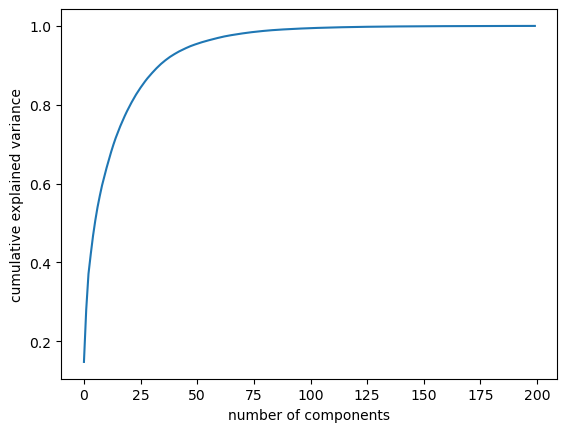

In [2]:
#open directory with the spectrograms and audio data.
used_raw_data = True

os.chdir('..')
os.chdir('./data/')

SampleFeatures = pd.read_csv('SampleSpectra6.csv', index_col = 0)

if used_raw_data:
    SampleWav = pd.read_csv('SampleWav6.csv', index_col = 0)
    SampleFeatures = pd.concat([SampleFeatures, SampleWav], axis = 1, join = 'inner')
    del SampleWav

print(len(SampleFeatures),'patches created with algorithm 6 loaded.')

# Have to rescale before using PCA
scaler = StandardScaler()
SampleFeatures = scaler.fit_transform(SampleFeatures)
# To do: extract vectors of means and stdevs to transform input for prediction later.
# Recall Z-score formula: (x-m)/s. That's exactly what this has done.
np.savetxt('mean6.csv',scaler.mean_, delimiter = ',')
np.savetxt('scale6.csv',scaler.scale_, delimiter = ',') #stdev

pca = PCA(n_components = 200) # Has to be <= min(# samples, # features)
pca.fit(SampleFeatures)
ReducedFeatures = pca.transform(SampleFeatures)
print(pca.explained_variance_)
print('reduced shape ', ReducedFeatures.shape)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

SAVING THIS PCA TO DISK

In [3]:
os.chdir('..')
os.chdir('./models/')

with open('pca6.pkl','wb') as export_file:
    pk.dump(pca, export_file)

# In training script and predictor program, use the following
# pca_reload = pk.load(open("pca.pkl",'rb'))
# result_new = pca_reload.transform(X)